## Preparando ambiente

In [27]:
install.packages('ggplot2')
require(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
install.packages('gridExtra')
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Custo vs Hectares

In [29]:
custo = read.csv('custo por hectares.csv')
head(custo)

,hectares,custo.mil
,<dbl>,<dbl>
1,846.3523,175.7877
2,1002.9328,168.6951
3,1094.1964,248.6157
4,1231.2610,198.0617
5,1196.1541,237.2227
6,1233.4934,228.4946


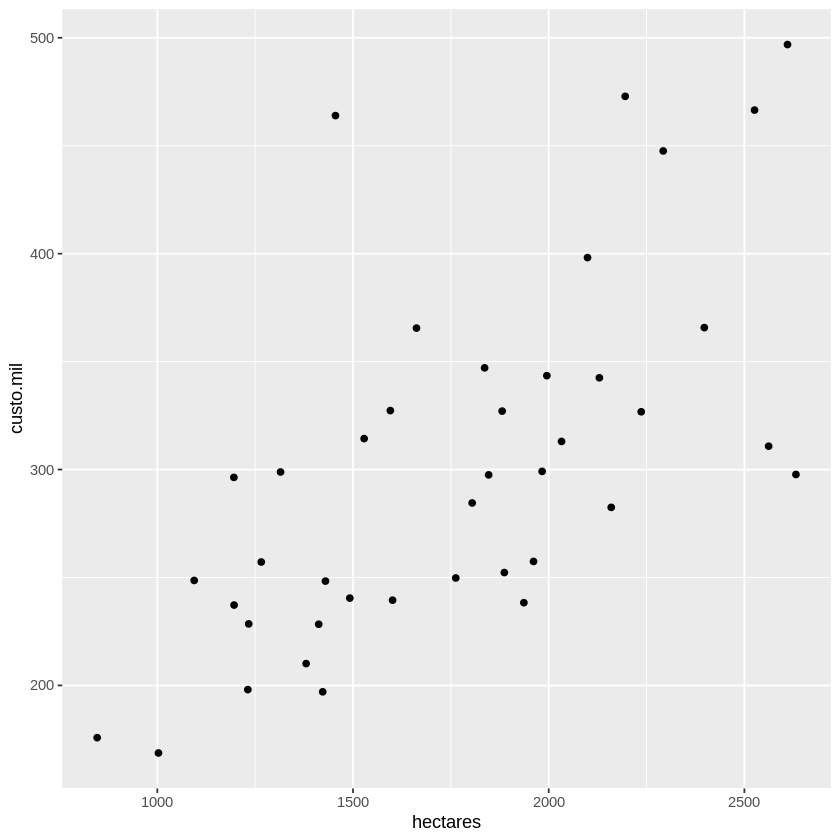

In [30]:
ggplot(custo, aes(hectares, custo.mil)) + geom_point()

## Modelando a associação

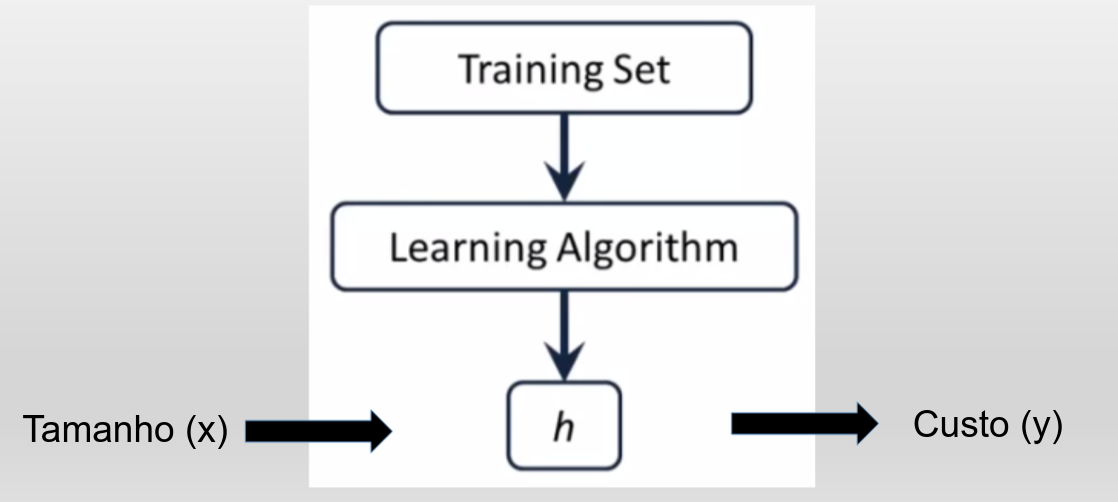

### H0: Associação linear

$custo = \theta_0 + \theta_1 hectares$

#### Qual a melhor opção para os parâmetros do modelo?

- $\theta_0 = 1.5$ e $\theta_1 = 0$
- $\theta_0 = 0$ e $\theta_1 = 0.5$
- $\theta_0 = 1$ e $\theta_1 = 0.5$

#### Função de custo (Cost function ou Fitness)

$\frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$ 

em que:

$\hat{y} = \theta_0 + \theta_1 hectares$

#### Qual a função de custo se theta0 = 1.5 e theta1 = 0?

In [31]:
theta0 = 1.5
theta1 = 0

custo$yhat = theta0 + theta1 * custo$hectares
head(custo)

,hectares,custo.mil,yhat
,<dbl>,<dbl>,<dbl>
1,846.3523,175.7877,1.5
2,1002.9328,168.6951,1.5
3,1094.1964,248.6157,1.5
4,1231.2610,198.0617,1.5
5,1196.1541,237.2227,1.5
6,1233.4934,228.4946,1.5


In [32]:
sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])

[1] 48331.6

#### Qual a função de custo se theta0 = 0 e theta1 = 0.5?

In [33]:
theta0 = 0
theta1 = 0.5

custo$yhat = theta0 + theta1 * custo$hectares
head(custo)

,hectares,custo.mil,yhat
,<dbl>,<dbl>,<dbl>
1,846.3523,175.7877,423.1762
2,1002.9328,168.6951,501.4664
3,1094.1964,248.6157,547.0982
4,1231.2610,198.0617,615.6305
5,1196.1541,237.2227,598.0770
6,1233.4934,228.4946,616.7467


In [34]:
sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])

[1] 184805.1

#### Qual a função de custo se theta0 = 1 e theta1 = 0.5?

In [35]:
theta0 = 1
theta1 = 0.5

custo$yhat = theta0 + theta1 * custo$hectares
head(custo)

,hectares,custo.mil,yhat
,<dbl>,<dbl>,<dbl>
1,846.3523,175.7877,424.1762
2,1002.9328,168.6951,502.4664
3,1094.1964,248.6157,548.0982
4,1231.2610,198.0617,616.6305
5,1196.1541,237.2227,599.0770
6,1233.4934,228.4946,617.7467


In [36]:
sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])

[1] 185383.6

#### Superfície de custo

In [37]:
theta0 = seq(-1000, 2000, 5)
theta1 = seq(-0.5, 0.5, 0.05)
xtheta0 = c()
ytheta1 = c()
fcusto = c()

In [38]:
for(i in theta0){
  for(j in theta1){
    custo$yhat = i + j * custo$hectares
    xtheta0 = append(xtheta0, i)
    ytheta1 = append(ytheta1, j)
    fcusto = append(fcusto, sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1]))
  }
}

In [39]:
surfaceCost = data.frame(xtheta0, ytheta1, fcusto)
head(surfaceCost)

,xtheta0,ytheta1,fcusto
,<dbl>,<dbl>,<dbl>
1,-1000,-0.50,2421080
2,-1000,-0.45,2226775
3,-1000,-0.40,2040743
4,-1000,-0.35,1862983
5,-1000,-0.30,1693496
6,-1000,-0.25,1532280


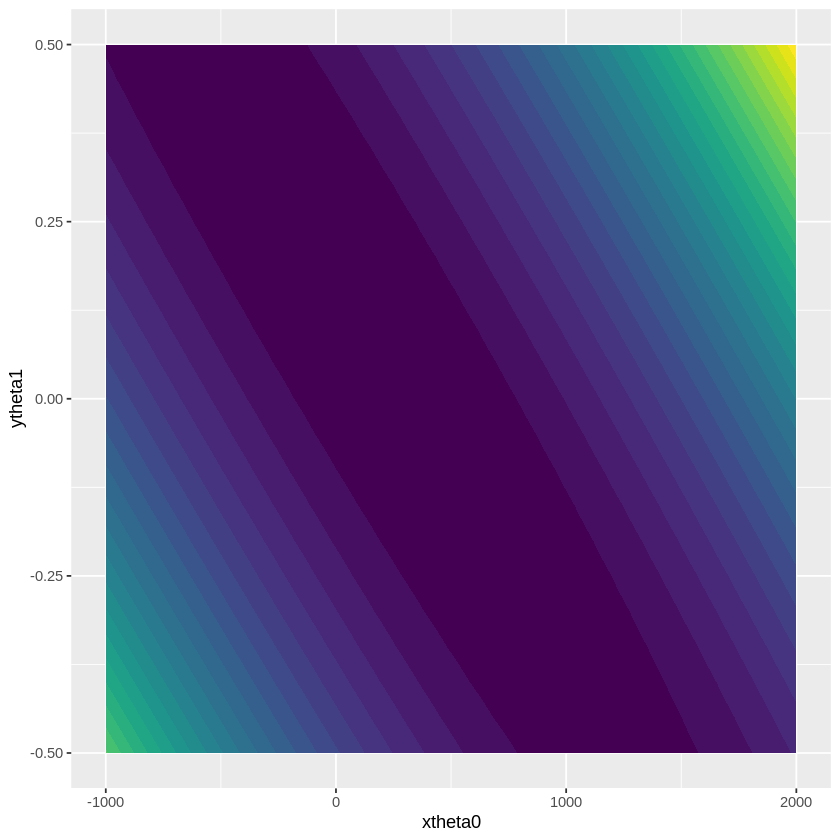

In [40]:
ggplot(surfaceCost, aes(xtheta0, ytheta1, z = fcusto)) + geom_contour_filled(bins = 30) + theme(legend.position = "none")

### Ponto inicial: theta0 = 800 e theta1 = -0.1

In [41]:
xtheta0 = 800
ytheta1 = -0.1
custo$yhat = xtheta0 + ytheta1 * custo$hectares
fcusto = sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])
fcusto

[1] 58907.7

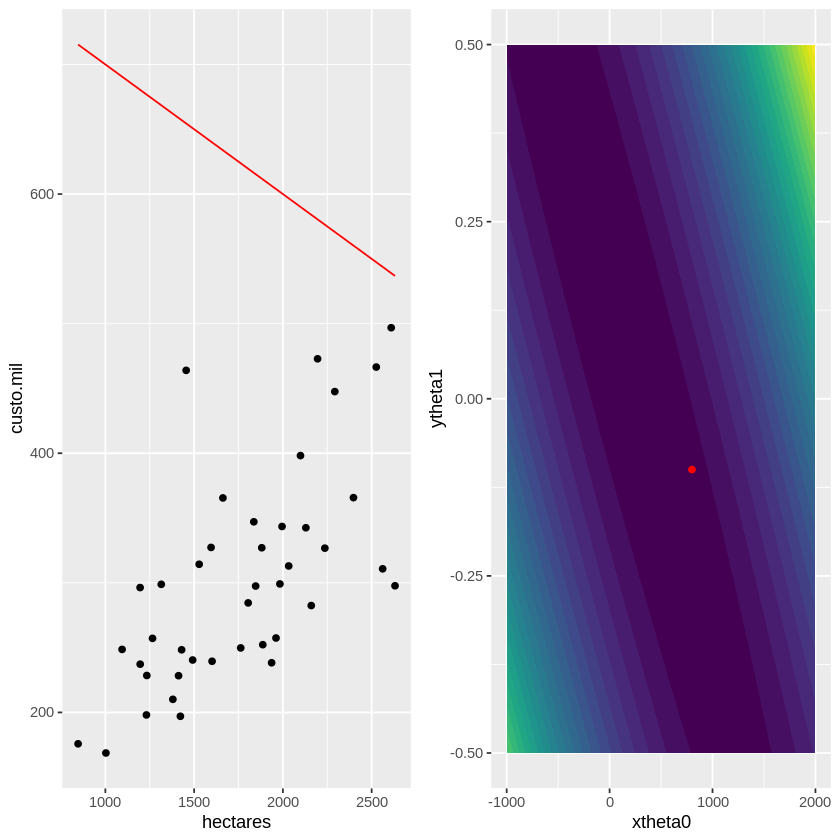

In [42]:
g1 = ggplot(data = custo, aes(x = hectares, y = custo.mil)) + 
  geom_point() +
  geom_line(color='red',data = custo, aes(x=hectares, y=yhat))

df = data.frame(xtheta0 = xtheta0, ytheta1 = ytheta1)
g2 = ggplot(surfaceCost, aes(xtheta0, ytheta1, z = fcusto)) + 
  geom_contour_filled(bins = 30) + 
  geom_point(data = df, col = 'red') +
  theme(legend.position = "none")
  
grid.arrange(g1, g2, nrow = 1)

### Ponto 2: theta0 = 400 e theta1 = 0

In [43]:
xtheta0 = 400
ytheta1 = 0
custo$yhat = xtheta0 + ytheta1 * custo$hectares
fcusto = sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])
fcusto

[1] 8180.68

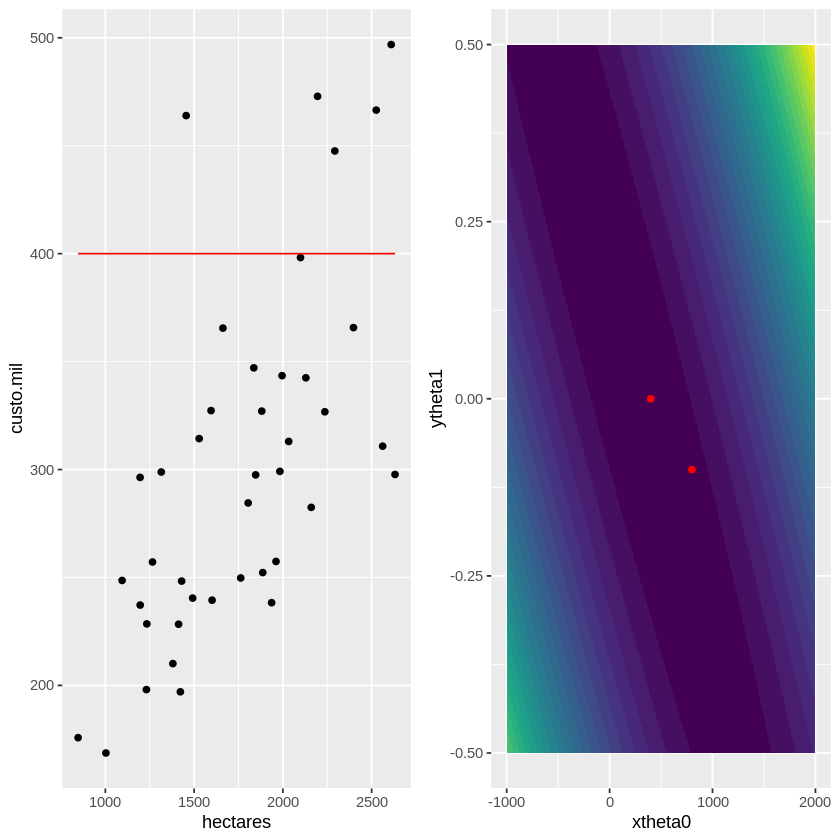

In [44]:
g3 = ggplot(data = custo, aes(x = hectares, y = custo.mil)) + 
  geom_point() +
  geom_line(color='red',data = custo, aes(x=hectares, y=yhat))

df2 = data.frame(xtheta0 = xtheta0, ytheta1 = ytheta1)
g4 = ggplot(surfaceCost, aes(xtheta0, ytheta1, z = fcusto)) + 
  geom_contour_filled(bins = 30) + 
  geom_point(data = df, col = 'red') +
  geom_point(data = df2, col = 'red') +
  theme(legend.position = "none")

grid.arrange(g3, g4, nrow = 1)

### Ponto 3: theta0 = 150 e theta1 = 0.15

In [45]:
xtheta0 = 50
ytheta1 = 0.15
custo$yhat = xtheta0 + ytheta1 * custo$hectares
fcusto = sum((custo$yhat - custo$custo.mil)^2) / (2*dim(custo)[1])
fcusto

[1] 2099.039

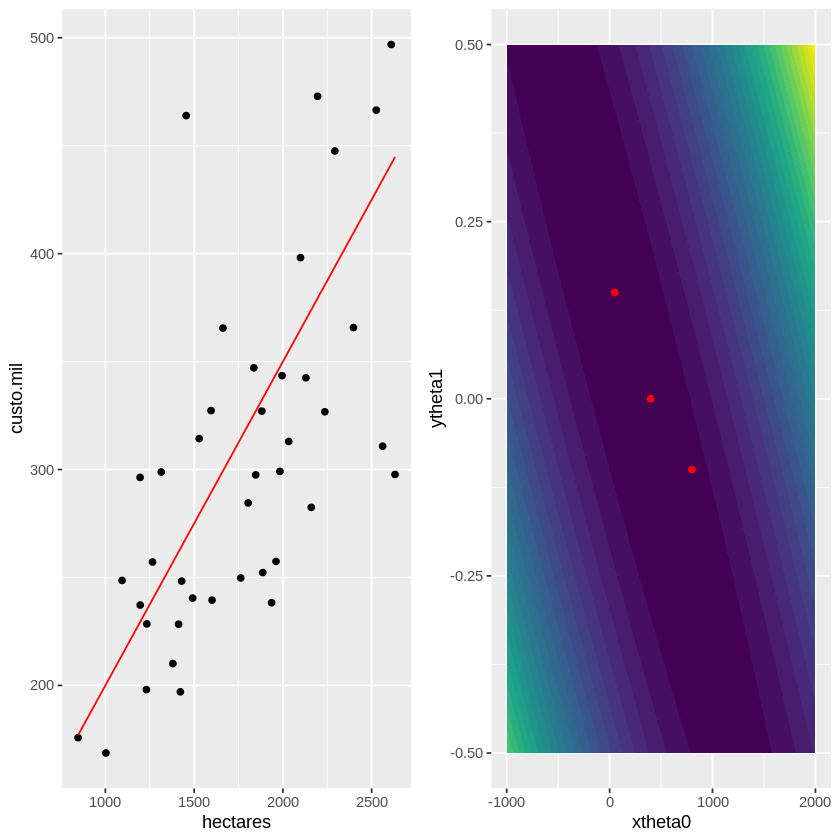

In [46]:
g5 = ggplot(data = custo, aes(x = hectares, y = custo.mil)) + 
  geom_point() +
  geom_line(color='red',data = custo, aes(x=hectares, y=yhat))

df3 = data.frame(xtheta0 = xtheta0, ytheta1 = ytheta1)
g6 = ggplot(surfaceCost, aes(xtheta0, ytheta1, z = fcusto)) + 
  geom_contour_filled(bins = 30) + 
  geom_point(data = df, col = 'red') +
  geom_point(data = df2, col = 'red') +
  geom_point(data = df3, col = 'red') +
  theme(legend.position = "none")

grid.arrange(g5, g6, nrow = 1)

Qual dos pontos melhor aprenderam a relação?